In [145]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy as np

In [146]:
website = 'https://www.cars.com/shopping/results/?stock_type=cpo&makes%5B%5D=&models%5B%5D=&list_price_max=&maximum_distance=20&zip='

In [147]:
response = requests.get(website)

In [148]:
response.status_code

200

In [149]:
soup = BeautifulSoup(response.content, 'html.parser')

In [150]:
results = soup.find_all('div', {'class' : 'vehicle-card'})

In [151]:
len(results)

21

In [152]:
results[0].find('h2').get_text()

'2017 Toyota Sienna SE'

In [153]:
results[0].find('div', {'class':'mileage'}).get_text()

'76,477 mi.'

In [154]:
results[0].find('div', {'class':'dealer-name'}).get_text().strip()

'Toyota of Cedar Park'

In [11]:
results[0].find('span', {'class':'sds-rating__count'}).get_text()

'4.9'

In [12]:
results[0].find('span', {'class':'sds-rating__link'}).get_text()

'(270 reviews)'

In [13]:
results[0].find('span', {'class':'primary-price'}).get_text()

'$63,988'

In [14]:
name = []
mileage = []
dealer_name = []
rating = []
review_count = []
price = []

for result in results:
    
    # name
    try:
        name.append(result.find('h2').get_text()) 
    except:
        name.append('n/a')
    
    # mileage
    try:
        mileage.append(result.find('div', {'class':'mileage'}).get_text())
    except:
        mileage.append('n/a')
    
    # dealer_name
    try:
        dealer_name.append(result.find('div', {'class':'dealer-name'}).get_text().strip())
    except:
        dealer_name.append('n/a')
        
    # rating
    try:
        rating.append(result.find('span', {'class':'sds-rating__count'}).get_text())
    except:
        rating.append('n/a')
    
    # review_count
    try:
        review_count.append(result.find('span', {'class':'sds-rating__link'}).get_text())
    except:
        review_count.append('n/a')
    
    #price 
    try:
        price.append(result.find('span', {'class':'primary-price'}).get_text())
    except:
        price.append('n/a')

In [15]:
# dictionary
car_dealer = pd.DataFrame({'Name': name, 'Mileage':mileage, 'Dealer Name':dealer_name,
                                'Rating': rating, 'Review Count': review_count, 'Price': price})

In [16]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2022 Nissan Armada Platinum,"12,313 mi.",DOUGLASS NISSAN OF WACO,4.9,(270 reviews),"$63,988"
1,2021 BMW 840 Gran Coupe i xDrive,"9,472 mi.",i.g. Burton Imports,n/a,(27 reviews),"$79,999"
2,2020 Honda Odyssey EX-L,"25,410 mi.",Wilde Honda,3.9,(837 reviews),"$38,495"
3,2021 Volkswagen Atlas 2.0T SE,"51,837 mi.",Volkswagen SouthTowne,4.5,"(1,290 reviews)","$32,660"
4,2021 Cadillac CT4 V-Series,"13,200 mi.",Rickenbaugh Cadillac Volvo Cars,4.6,"(2,659 reviews)","$48,000"
5,2019 BMW 430 Gran Coupe i xDrive,"25,193 mi.",Schomp BMW,4.8,"(1,842 reviews)","$35,597"
6,2019 Porsche Cayenne Turbo,"52,389 mi.",Porsche Beaverton,4.8,(421 reviews),"$96,992"
7,2021 Honda Odyssey EX-L,"18,903 mi.",Bend Honda,4.8,(720 reviews),"$38,996"
8,2022 Kia Stinger GT-Line,"13,861 mi.",Bridgewater KIA,4.8,(563 reviews),"$42,400"
9,2020 Volvo XC90 T5 Momentum 7 Passenger,"25,907 mi.",Younger Toyota,4.5,"(2,024 reviews)","$41,685"


In [17]:
name = []
mileage = []
dealer_name = []
rating = []
review_count = []
price = []

for i in range (1,500):
    
    # website in variable
    website = 'https://www.cars.com/shopping/results/?page='+ str(i) +'&page_size=20&list_price_max=&makes[]=&maximum_distance=20&models[]=&stock_type=cpo&zip=' 
    
    # request to website
    response = requests.get(website)
    
    # soup object
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # results
    results = soup.find_all('div', {'class' : 'vehicle-card'})
    
    # loop through results
    for result in results:
    
        # name
        try:
            name.append(result.find('h2').get_text()) 
        except:
            name.append('n/a')

        # mileage
        try:
            mileage.append(result.find('div', {'class':'mileage'}).get_text())
        except:
            mileage.append('n/a')

        # dealer_name
        try:
            dealer_name.append(result.find('div', {'class':'dealer-name'}).get_text().strip())
        except:
            dealer_name.append('n/a')
            
              # rating
        try:
            rating.append(result.find('span', {'class':'sds-rating__count'}).get_text())
        except:
            rating.append('n/a')

        # review_count
        try:
            review_count.append(result.find('span', {'class':'sds-rating__link'}).get_text())
        except:
            review_count.append('n/a')

        #price 
        try:
            price.append(result.find('span', {'class':'primary-price'}).get_text())
        except:
            price.append('n/a')

In [18]:
# dictionary
car_dealer = pd.DataFrame({'Name': name, 'Mileage':mileage, 'Dealer Name':dealer_name,
                                'Rating': rating, 'Review Count': review_count, 'Price': price})

In [19]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2022 Nissan Armada Platinum,"12,313 mi.",DOUGLASS NISSAN OF WACO,4.9,(270 reviews),"$63,988"
1,2021 BMW 840 Gran Coupe i xDrive,"9,472 mi.",i.g. Burton Imports,n/a,(27 reviews),"$79,999"
2,2020 Honda Odyssey EX-L,"25,410 mi.",Wilde Honda,3.9,(837 reviews),"$38,495"
3,2021 Volkswagen Atlas 2.0T SE,"51,837 mi.",Volkswagen SouthTowne,4.5,"(1,290 reviews)","$32,660"
4,2021 Cadillac CT4 V-Series,"13,200 mi.",Rickenbaugh Cadillac Volvo Cars,4.6,"(2,659 reviews)","$48,000"
...,...,...,...,...,...,...
10078,2021 Cadillac Escalade Sport Platinum,"19,257 mi.",Central Cadillac,4.6,(143 reviews),"$104,826"
10079,2022 Cadillac Escalade Premium Luxury,"16,430 mi.",Central Cadillac,4.6,(143 reviews),"$92,266"
10080,2022 Cadillac Escalade Premium Luxury,"11,237 mi.",Medina Auto Mall,4.4,(258 reviews),"$96,247"
10081,2019 Maserati Levante GTS,"22,566 mi.",Maserati Alfa Romeo of Wilmington Pike,3.4,(89 reviews),"$83,783"


In [20]:
car_dealer['Review Count'] = car_dealer['Review Count'].apply(lambda x: x.strip('reviews)').strip('('))

In [191]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2022 Nissan Armada Platinum,"12,313 mi.",DOUGLASS NISSAN OF WACO,4.9,270,"$63,988"
1,2021 BMW 840 Gran Coupe i xDrive,"9,472 mi.",i.g. Burton Imports,n/a,27,"$79,999"
2,2020 Honda Odyssey EX-L,"25,410 mi.",Wilde Honda,3.9,837,"$38,495"
3,2021 Volkswagen Atlas 2.0T SE,"51,837 mi.",Volkswagen SouthTowne,4.5,"1,290","$32,660"
4,2021 Cadillac CT4 V-Series,"13,200 mi.",Rickenbaugh Cadillac Volvo Cars,4.6,"2,659","$48,000"
...,...,...,...,...,...,...
10078,2021 Cadillac Escalade Sport Platinum,"19,257 mi.",Central Cadillac,4.6,143,"$104,826"
10079,2022 Cadillac Escalade Premium Luxury,"16,430 mi.",Central Cadillac,4.6,143,"$92,266"
10080,2022 Cadillac Escalade Premium Luxury,"11,237 mi.",Medina Auto Mall,4.4,258,"$96,247"
10081,2019 Maserati Levante GTS,"22,566 mi.",Maserati Alfa Romeo of Wilmington Pike,3.4,89,"$83,783"


In [23]:
car_dealer.to_csv('cars_data.csv', index=False)

# DATA ANALYSIS

In [155]:
import pandas as pd

In [371]:
df = pd.read_csv('cars_data.csv')

In [372]:
df.head()

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2022 Nissan Armada Platinum,"12,313 mi.",DOUGLASS NISSAN OF WACO,4.9,270,"$63,988"
1,2021 BMW 840 Gran Coupe i xDrive,"9,472 mi.",i.g. Burton Imports,NaN,27,"$79,999"
2,2020 Honda Odyssey EX-L,"25,410 mi.",Wilde Honda,3.9,837,"$38,495"
3,2021 Volkswagen Atlas 2.0T SE,"51,837 mi.",Volkswagen SouthTowne,4.5,"1,290","$32,660"
4,2021 Cadillac CT4 V-Series,"13,200 mi.",Rickenbaugh Cadillac Volvo Cars,4.6,"2,659","$48,000"


In [373]:
df.columns

Index(['Name', 'Mileage', 'Dealer Name', 'Rating', 'Review Count', 'Price'], dtype='object')

In [374]:
df.dtypes

Name             object
Mileage          object
Dealer Name      object
Rating          float64
Review Count     object
Price            object
dtype: object

In [375]:
df['Make']= df['Name'].str.split(' ', expand=True).get(1,4)


In [376]:
df['Year'] = df['Name'].str.split(' ', expand=True).get(0)

In [377]:
df.head()

,Name,Mileage,Dealer Name,Rating,Review Count,Price,Make,Year
0,2022 Nissan Armada Platinum,"12,313 mi.",DOUGLASS NISSAN OF WACO,4.9,270,"$63,988",Nissan,2022
1,2021 BMW 840 Gran Coupe i xDrive,"9,472 mi.",i.g. Burton Imports,NaN,27,"$79,999",BMW,2021
2,2020 Honda Odyssey EX-L,"25,410 mi.",Wilde Honda,3.9,837,"$38,495",Honda,2020
3,2021 Volkswagen Atlas 2.0T SE,"51,837 mi.",Volkswagen SouthTowne,4.5,"1,290","$32,660",Volkswagen,2021
4,2021 Cadillac CT4 V-Series,"13,200 mi.",Rickenbaugh Cadillac Volvo Cars,4.6,"2,659","$48,000",Cadillac,2021


In [378]:
df['Year'] = df['Name'].str.split(' ').str.get(0).rename({0: 'Year'})

In [379]:
df['Year']

0         NaN
1        2021
2        2020
3        2021
4        2021
         ... 
10078    2021
10079    2022
10080    2022
10081    2019
10082    2019
Name: Year, Length: 10083, dtype: object

In [380]:
# df.Name.str.extract('(?P<Year>\d{1,4})')
df['Name'].str.partition(' ')[[0, 2]].rename({0: 'Year', 2: 'Make'})
# 


,0,2
Year,2022,Nissan Armada Platinum
1,2021,BMW 840 Gran Coupe i xDrive
Make,2020,Honda Odyssey EX-L
3,2021,Volkswagen Atlas 2.0T SE
4,2021,Cadillac CT4 V-Series
...,...,...
10078,2021,Cadillac Escalade Sport Platinum
10079,2022,Cadillac Escalade Premium Luxury
10080,2022,Cadillac Escalade Premium Luxury
10081,2019,Maserati Levante GTS


In [381]:
df.insert(0, "Make Year", df.Year, True)

In [382]:
df.insert(1, "Make Name", df.Make, True)

In [383]:
df

,Make Year,Make Name,Name,Mileage,Dealer Name,Rating,Review Count,Price,Make,Year
0,NaN,Nissan,2022 Nissan Armada Platinum,"12,313 mi.",DOUGLASS NISSAN OF WACO,4.9,270,"$63,988",Nissan,NaN
1,2021,BMW,2021 BMW 840 Gran Coupe i xDrive,"9,472 mi.",i.g. Burton Imports,NaN,27,"$79,999",BMW,2021
2,2020,Honda,2020 Honda Odyssey EX-L,"25,410 mi.",Wilde Honda,3.9,837,"$38,495",Honda,2020
3,2021,Volkswagen,2021 Volkswagen Atlas 2.0T SE,"51,837 mi.",Volkswagen SouthTowne,4.5,"1,290","$32,660",Volkswagen,2021
4,2021,Cadillac,2021 Cadillac CT4 V-Series,"13,200 mi.",Rickenbaugh Cadillac Volvo Cars,4.6,"2,659","$48,000",Cadillac,2021
...,...,...,...,...,...,...,...,...,...,...
10078,2021,Cadillac,2021 Cadillac Escalade Sport Platinum,"19,257 mi.",Central Cadillac,4.6,143,"$104,826",Cadillac,2021
10079,2022,Cadillac,2022 Cadillac Escalade Premium Luxury,"16,430 mi.",Central Cadillac,4.6,143,"$92,266",Cadillac,2022
10080,2022,Cadillac,2022 Cadillac Escalade Premium Luxury,"11,237 mi.",Medina Auto Mall,4.4,258,"$96,247",Cadillac,2022
10081,2019,Maserati,2019 Maserati Levante GTS,"22,566 mi.",Maserati Alfa Romeo of Wilmington Pike,3.4,89,"$83,783",Maserati,2019


In [384]:
df = df.drop(columns=['Name', 'Make', 'Year'])

In [385]:
df

,Make Year,Make Name,Mileage,Dealer Name,Rating,Review Count,Price
0,NaN,Nissan,"12,313 mi.",DOUGLASS NISSAN OF WACO,4.9,270,"$63,988"
1,2021,BMW,"9,472 mi.",i.g. Burton Imports,NaN,27,"$79,999"
2,2020,Honda,"25,410 mi.",Wilde Honda,3.9,837,"$38,495"
3,2021,Volkswagen,"51,837 mi.",Volkswagen SouthTowne,4.5,"1,290","$32,660"
4,2021,Cadillac,"13,200 mi.",Rickenbaugh Cadillac Volvo Cars,4.6,"2,659","$48,000"
...,...,...,...,...,...,...,...
10078,2021,Cadillac,"19,257 mi.",Central Cadillac,4.6,143,"$104,826"
10079,2022,Cadillac,"16,430 mi.",Central Cadillac,4.6,143,"$92,266"
10080,2022,Cadillac,"11,237 mi.",Medina Auto Mall,4.4,258,"$96,247"
10081,2019,Maserati,"22,566 mi.",Maserati Alfa Romeo of Wilmington Pike,3.4,89,"$83,783"


In [387]:
df['Mileage']=df['Mileage'].str.replace('mi.','')
df['Mileage']=df['Mileage'].str.strip()
df['Mileage']=df['Mileage'].str.replace(',','')

In [388]:
# df['Mileage']=df['Mileage'].replace(',','')
# # df['Mileage']=df['Mileage'].strip()

In [389]:
df['Mileage']

0        12313
1         9472
2        25410
3        51837
4        13200
         ...  
10078    19257
10079    16430
10080    11237
10081    22566
10082    30032
Name: Mileage, Length: 10083, dtype: object

In [390]:
len(df)

10083

In [391]:
df['Price']=df['Price'].str.replace('$','')
df['Price']=df['Price'].str.strip()

In [392]:
df['Price']=df['Price'].str.replace(',','')
# df['Price']=df['Price'].astype('int')

In [393]:
df['Price']

0         63988
1         79999
2         38495
3         32660
4         48000
          ...  
10078    104826
10079     92266
10080     96247
10081     83783
10082     32971
Name: Price, Length: 10083, dtype: object

In [394]:
df.isnull().sum().sum()

1207

In [395]:
df.columns[df.isna().any()]

Index(['Make Year', 'Mileage', 'Rating', 'Review Count'], dtype='object')

In [396]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context= 'notebook', ticks= True, grid= False)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings('ignore')


In [397]:
df.columns

Index(['Make Year', 'Make Name', 'Mileage', 'Dealer Name', 'Rating',
       'Review Count', 'Price'],
      dtype='object')

In [399]:
df['Make Name'].unique()

array(['Nissan', 'BMW', 'Honda', 'Volkswagen', 'Cadillac', 'Porsche',
       'Kia', 'Volvo', 'Chevrolet', 'Toyota', 'Dodge', 'GMC', 'Ford',
       'Jeep', 'RAM', 'INFINITI', 'Subaru', 'Maserati', 'Rolls-Royce',
       'Buick', 'MINI', 'Acura', 'Chrysler', 'Ferrari', 'Bentley',
       'Aston', 'Alfa', 'Mercedes-Benz', 'Mitsubishi', 'FIAT'],
      dtype=object)

In [413]:
fig = px.histogram(df, x = "Make Name", labels= {"Make Name": "Name of the Manufacturer"}, title= "Manufacturer of the car", color_discrete_sequence= ["blue"])

fig.show()

In [414]:
fig = px.histogram(df, x = "Dealer Name", labels= {"Dealer": "Name of the Dearler"}, title= "Name Dealer", color_discrete_sequence= ["blue"])

fig.show()

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10083 entries, 0 to 10082
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make Year     10082 non-null  object 
 1   Make Name     10083 non-null  object 
 2   Mileage       10082 non-null  object 
 3   Dealer Name   10083 non-null  object 
 4   Rating        8942 non-null   float64
 5   Review Count  10019 non-null  object 
 6   Price         10083 non-null  object 
dtypes: float64(1), object(6)
memory usage: 551.5+ KB


In [412]:
fig = px.histogram(df, x = "Make Year", labels= {"Make Year": "Year of Manufacture"}, title= "Manufactured Year", color_discrete_sequence= ["blue"])

fig.show()

In [403]:
df['Rating'].isna().any()

True

In [404]:
df['Rating'].isnull().sum()

1141

In [78]:
df.shape

(10083, 6)

In [427]:
df.describe()

,Mileage,Rating,Review Count,Price
count,10082.000000,8942.000000,6748.000000,1.007800e+04
mean,25294.297262,4.356251,337.790456,5.351146e+04
std,19237.012196,0.647987,283.678567,5.129803e+04
min,0.000000,1.300000,0.000000,9.900000e+03
25%,10736.000000,4.100000,86.000000,3.429550e+04
50%,22129.500000,4.600000,258.000000,4.199900e+04
75%,36133.000000,4.800000,536.000000,5.582400e+04
max,656820.000000,5.000000,998.000000,1.275000e+06


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10083 entries, 0 to 10082
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          10083 non-null  object 
 1   Mileage       10082 non-null  object 
 2   Dealer Name   10083 non-null  object 
 3   Rating        8942 non-null   float64
 4   Review Count  10019 non-null  object 
 5   Price         10083 non-null  object 
dtypes: float64(1), object(5)
memory usage: 472.8+ KB


In [415]:
df['Mileage'] = pd.to_numeric(df['Mileage'],errors='coerce')

In [416]:
# df['Review Count'] = pd.to_numeric(df['Review Count'],errors='coerce')

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10083 entries, 0 to 10082
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make Year     10082 non-null  object 
 1   Make Name     10083 non-null  object 
 2   Mileage       10082 non-null  float64
 3   Dealer Name   10083 non-null  object 
 4   Rating        8942 non-null   float64
 5   Review Count  6748 non-null   float64
 6   Price         10083 non-null  object 
dtypes: float64(3), object(4)
memory usage: 551.5+ KB


In [418]:
df['Price'].str.strip()

0         63988
1         79999
2         38495
3         32660
4         48000
          ...  
10078    104826
10079     92266
10080     96247
10081     83783
10082     32971
Name: Price, Length: 10083, dtype: object

In [420]:
df['Price'] = df['Price'].convert_dtypes(int)

In [421]:
df['Price'].isna().sum()

0

In [422]:
df['Price'] = df['Price'].replace({',':''}, regex=True)

In [423]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [424]:
df['Price'].isna().sum()

5

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10083 entries, 0 to 10082
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make Year     10082 non-null  object 
 1   Make Name     10083 non-null  object 
 2   Mileage       10082 non-null  float64
 3   Dealer Name   10083 non-null  object 
 4   Rating        8942 non-null   float64
 5   Review Count  6748 non-null   float64
 6   Price         10078 non-null  float64
dtypes: float64(4), object(3)
memory usage: 551.5+ KB


In [426]:
df.corr()

,Mileage,Rating,Review Count,Price
Mileage,1.000000,-0.005284,0.012379,-0.229370
Rating,-0.005284,1.000000,0.269129,0.023884
Review Count,0.012379,0.269129,1.000000,-0.115762
Price,-0.229370,0.023884,-0.115762,1.000000


In [ ]:
import missingno as mno
mno.bar(df[df.columns[df.isna().any()]], sort = 'ascending', color = 'green')

In [ ]:
plt.figure(figsize=[15,8])
sns.displot(df['Mileage'], aspect=2)
plt.show()
# fig, ax =plt.subplots(figsize = (10,8))

In [ ]:
plt.figure(figsize=[15,8])
sns.displot(df['Review Count'], aspect=2)
plt.show()

In [ ]:
plt.figure(figsize=[15,8])
sns.displot(df['Rating'], aspect=2)
plt.show()

<AxesSubplot:>

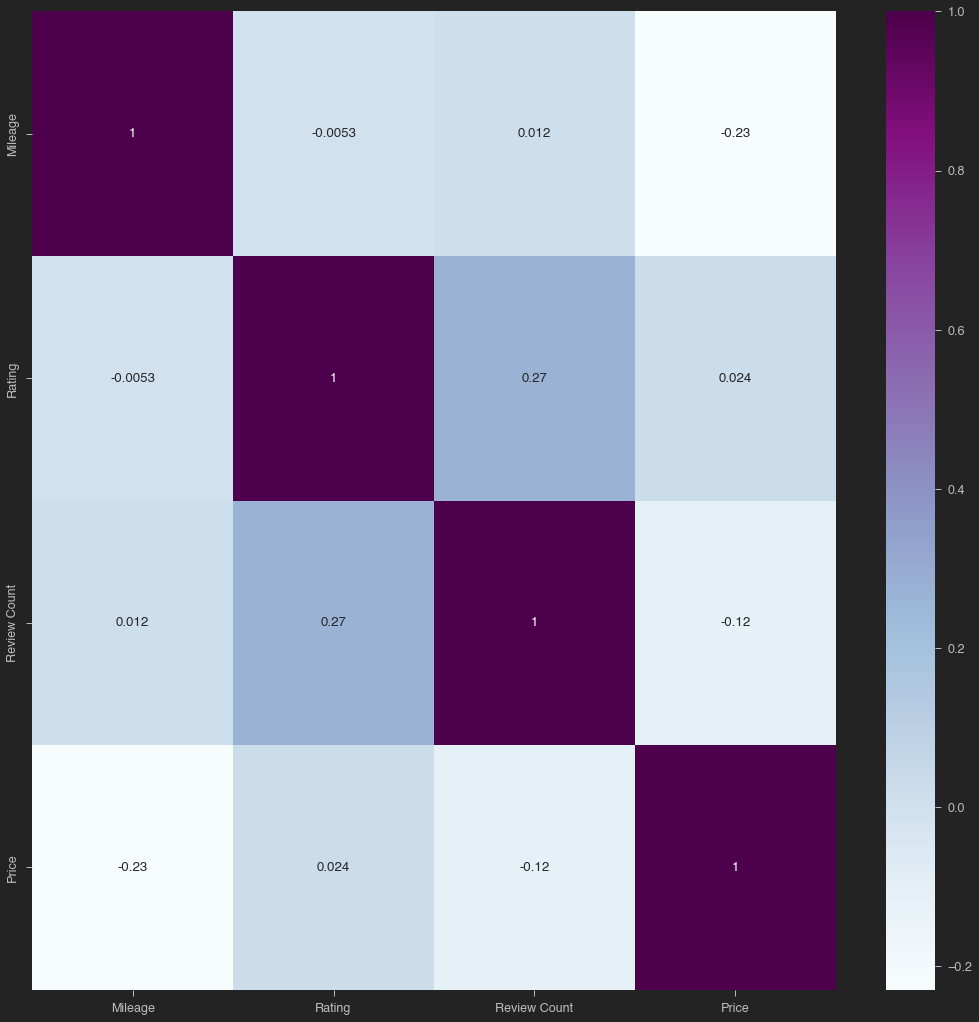

In [429]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cmap="BuPu", annot=True)

In [ ]:
# Using Pearson's correalation
plt.figure(figsize = (15,8))
cor = df.corr()
cmap = plt.cm.Reds
sns.heatmap(cor, annot = True, cmap = cmap)
plt.show()

In [430]:
df.dtypes

Make Year        object
Make Name        object
Mileage         float64
Dealer Name      object
Rating          float64
Review Count    float64
Price           float64
dtype: object

In [431]:
df.columns

Index(['Make Year', 'Make Name', 'Mileage', 'Dealer Name', 'Rating',
       'Review Count', 'Price'],
      dtype='object')

In [438]:
df.isna().sum()

Make Year          1
Make Name          0
Mileage            1
Dealer Name        0
Rating          1141
Review Count    3335
Price              5
dtype: int64

In [436]:
df['Rating'].isna().sum()

1141

In [ ]:
# Getting total number of NULL values and percentage of the columns
# null_columns = df.columns[df.isna().any()]
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data

In [439]:
df = df.drop(columns=['Rating', 'Review Count'])

Dropping above columns as missing value count is more than 10%

In [453]:
df = df.fillna(0)

In [454]:
df.head()

,Make Year,Make Name,Mileage,Dealer Name,Price
0,0,Nissan,12313.0,DOUGLASS NISSAN OF WACO,63988.0
1,2021,BMW,9472.0,i.g. Burton Imports,79999.0
2,2020,Honda,25410.0,Wilde Honda,38495.0
3,2021,Volkswagen,51837.0,Volkswagen SouthTowne,32660.0
4,2021,Cadillac,13200.0,Rickenbaugh Cadillac Volvo Cars,48000.0


In [474]:
df.dtypes

Make Year       object
Make Name       object
Mileage        float64
Dealer Name     object
Price          float64
dtype: object

In [455]:
df_new = pd.get_dummies(df, columns=['Make Year', 'Make Name', 'Dealer Name'])

In [456]:
df_new.head()

,Mileage,Price,Make Year_0,Make Year_2008,Make Year_2010,Make Year_2011,Make Year_2012,Make Year_2013,Make Year_2014,Make Year_2015,...,Dealer Name_Zeigler Chrysler Dodge Jeep Ram of Schaumburg,Dealer Name_Zeigler Honda of Racine,Dealer Name_Zeigler Nissan of Orland Park,Dealer Name_Zeigler Subaru of Merrillville,Dealer Name_Zeigler Toyota of Racine,Dealer Name_Zimbrick Buick GMC Eastside,Dealer Name_Zimbrick Honda,Dealer Name_Zimbrick Volkswagen of Madison Preowned,Dealer Name_Zimmerman Honda,Dealer Name_i.g. Burton Imports
0,12313.0,63988.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9472.0,79999.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25410.0,38495.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,51837.0,32660.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13200.0,48000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [457]:
df_new.shape

(10083, 3583)

In [475]:
df_new.dtypes

Mileage                                                float64
Price                                                  float64
Make Year_0                                              uint8
Make Year_2008                                           uint8
Make Year_2010                                           uint8
                                                        ...   
Dealer Name_Zimbrick Buick GMC Eastside                  uint8
Dealer Name_Zimbrick Honda                               uint8
Dealer Name_Zimbrick Volkswagen of Madison Preowned      uint8
Dealer Name_Zimmerman Honda                              uint8
Dealer Name_i.g. Burton Imports                          uint8
Length: 3583, dtype: object

In [478]:
df_new = df_new.astype(int)

In [ ]:
# df['col'] = df['col'].astype(str).apply(lambda x: x.replace('.0',''))

In [479]:
df_new.round()

,Mileage,Price,Make Year_0,Make Year_2008,Make Year_2010,Make Year_2011,Make Year_2012,Make Year_2013,Make Year_2014,Make Year_2015,...,Dealer Name_Zeigler Chrysler Dodge Jeep Ram of Schaumburg,Dealer Name_Zeigler Honda of Racine,Dealer Name_Zeigler Nissan of Orland Park,Dealer Name_Zeigler Subaru of Merrillville,Dealer Name_Zeigler Toyota of Racine,Dealer Name_Zimbrick Buick GMC Eastside,Dealer Name_Zimbrick Honda,Dealer Name_Zimbrick Volkswagen of Madison Preowned,Dealer Name_Zimmerman Honda,Dealer Name_i.g. Burton Imports
0,12313,63988,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9472,79999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25410,38495,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,51837,32660,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13200,48000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,19257,104826,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10079,16430,92266,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10080,11237,96247,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10081,22566,83783,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [480]:
X = df_new.drop('Price', axis = 1)
y = df_new['Price']

In [481]:
X

,Mileage,Make Year_0,Make Year_2008,Make Year_2010,Make Year_2011,Make Year_2012,Make Year_2013,Make Year_2014,Make Year_2015,Make Year_2016,...,Dealer Name_Zeigler Chrysler Dodge Jeep Ram of Schaumburg,Dealer Name_Zeigler Honda of Racine,Dealer Name_Zeigler Nissan of Orland Park,Dealer Name_Zeigler Subaru of Merrillville,Dealer Name_Zeigler Toyota of Racine,Dealer Name_Zimbrick Buick GMC Eastside,Dealer Name_Zimbrick Honda,Dealer Name_Zimbrick Volkswagen of Madison Preowned,Dealer Name_Zimmerman Honda,Dealer Name_i.g. Burton Imports
0,12313,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9472,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25410,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,51837,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13200,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,19257,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10079,16430,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10080,11237,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10081,22566,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [482]:
y

0         63988
1         79999
2         38495
3         32660
4         48000
          ...  
10078    104826
10079     92266
10080     96247
10081     83783
10082     32971
Name: Price, Length: 10083, dtype: int64

In [483]:
X = np.array(X)
y = np.array(y)

In [484]:
from sklearn.model_selection import train_test_split

In [485]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2, random_state=2)

# Linear Regression

In [486]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)


-598627525.1786252

In [491]:
# Calculation of R2 Score
from sklearn.model_selection import cross_val_score
print(cross_val_score(linear_model, X, y, cv=10, scoring="r2").mean())

-7005456415478.537


# Tree Model

In [489]:
from sklearn.tree import DecisionTreeRegressor
dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)
dec_model.score(X_test, y_test)

0.7055078540181714

# Random Regressor

In [490]:
from sklearn.ensemble import RandomForestRegressor
Random_model = RandomForestRegressor()
Random_model.fit(X_train, y_train)
Random_model.score(X_test, y_test)

0.832632199301788

# XGB Regressor Model

In [469]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.8344294255606518

# Ridge Model

In [494]:
from sklearn.linear_model import  Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_model.score(X_test, y_test)

0.727484056999644

# Lasso Model

In [493]:
from sklearn.linear_model import  Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_model.score(X_test, y_test)

0.6922808637452313